In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the dataset
file_path = '/content/drive/MyDrive/Dataset/ML_job_glassdore (1).csv'

# Load the dataset
ml_job_listings = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(ml_job_listings.head())

                           job_title                     company_name  \
0                    VP, Engineering                             Calm   
1              Junior AI/ML Engineer               Smith & Associates   
2               Junior Data Engineer                             Bose   
3     Software Engineer, ML Platform                        Pinterest   
4  [ No C2C ] ML Engineer - w/PYTHON  Production Modeling Corporation   

            place                         salary  
0          Remote  $325K - $375K (Employer est.)  
1     Houston, TX   $42K - $64K (Glassdoor est.)  
2  Framingham, MA  $88K - $129K (Glassdoor est.)  
3          Remote                            NaN  
4        Troy, MI  $150K - $162K (Employer est.)  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(ml_job_listings.describe())

                        job_title company_name   place  \
count                         300          299     300   
unique                        239          211      88   
top     Machine Learning Engineer        Apple  Remote   
freq                           11           36      65   

                               salary  
count                             217  
unique                            188  
top     $173K - $241K (Employer est.)  
freq                                4  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**DATA CLEANING**
Handling missing company names

In [ ]:
ml_job_listings[ml_job_listings["company_name"].isna()]
ml_job_listings.iloc[209, 1] = "Sample Company"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Displaying top 15 value counts for the salary column

In [ ]:
salary_column = ml_job_listings.iloc[:, 3].value_counts()
print(salary_column.head(15))

salary
$173K - $241K (Employer est.)              4
$160K - $210K (Employer est.)              3
$150K - $200K (Employer est.)              3
$181K - $246K (Employer est.)              3
$140K - $180K (Employer est.)              3
$190K - $245K (Employer est.)              2
$78K - $122K (Employer est.)               2
$76K - $120K (Glassdoor est.)              2
$135K (Employer est.)                      2
$55K - $60K (Employer est.)                2
$135K - $200K (Employer est.)              2
$152K (Employer est.)                      2
$73K - $166K (Employer est.)               2
$214K (Employer est.)                      2
$60.00 - $70.00 Per Hour(Employer est.)    2
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to add empty columns
def add_empty_columns(df):
    return pd.concat([
        df,
        pd.Series(np.nan, index=df.index, name="minimum_salary"),
        pd.Series(np.nan, index=df.index, name="maximum_salary"),
        pd.Series(np.nan, index=df.index, name="estimated_by")
    ], axis=1)

# Function to separate hourly salary data
def separate_hourly_data(row):
    slist = row[3].split(" ")
    minimum, maximum, estimated_by = None, None, None

    if len(slist) == 6:
        minimum = float(slist[0].replace("$", "")) * 2080 // 1000
        maximum = float(slist[2].replace("$", "")) * 2080 // 1000
        estimated_by = slist[4].replace("Hour(", "")
    elif len(slist) == 4:
        minimum = float(slist[0].replace("$", "")) * 2080 // 1000
        maximum = minimum
        estimated_by = slist[2].replace("Hour(", "")

    return [
        row[0],
        row[1],
        row[2],
        np.nan,
        minimum,
        maximum,
        estimated_by
    ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to separate yearly salary data
def separate_salary_data(row):
    slist = row[3].split(" ")
    minimum, maximum, estimated_by = None, None, None

    if len(slist) == 5:
        minimum = slist[0].replace("K", "").replace("$", "")
        maximum = slist[2].replace("K", "").replace("$", "")
        estimated_by = slist[3].replace("(", "")
    elif len(slist) == 3:
        minimum = slist[0].replace("K", "").replace("$", "")
        maximum = minimum
        estimated_by = slist[1].replace("(", "")

    return [
        row[0],
        row[1],
        row[2],
        np.nan,
        minimum,
        maximum,
        estimated_by
    ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def separate_hourly_data(row):
    slist = row.iloc[3].split(" ")  # Using iloc for position-based indexing
    minimum, maximum, estimated_by = None, None, None

    if len(slist) == 6:
        minimum = float(slist[0].replace("$", "")) * 2080 // 1000
        maximum = float(slist[2].replace("$", "")) * 2080 // 1000
        estimated_by = slist[4].replace("Hour(", "")
    elif len(slist) == 4:
        minimum = float(slist[0].replace("$", "")) * 2080 // 1000
        maximum = minimum
        estimated_by = slist[2].replace("Hour(", "")

    return [
        row.iloc[0],  # Using iloc here
        row.iloc[1],  # Using iloc here
        row.iloc[2],  # Using iloc here
        np.nan,
        minimum,
        maximum,
        estimated_by
    ]

def separate_salary_data(row):
    slist = row.iloc[3].split(" ")  # Using iloc for position-based indexing
    minimum, maximum, estimated_by = None, None, None

    if len(slist) == 5:
        minimum = slist[0].replace("K", "").replace("$", "")
        maximum = slist[2].replace("K", "").replace("$", "")
        estimated_by = slist[3].replace("(", "")
    elif len(slist) == 3:
        minimum = slist[0].replace("K", "").replace("$", "")
        maximum = minimum
        estimated_by = slist[1].replace("(", "")

    return [
        row.iloc[0],  # Using iloc here
        row.iloc[1],  # Using iloc here
        row.iloc[2],  # Using iloc here
        np.nan,
        minimum,
        maximum,
        estimated_by
    ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
missing = ml_job_listings[ml_job_listings["salary"].isna()]
missing = add_empty_columns(missing)
ml_job_listings.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hourly = ml_job_listings[ml_job_listings["salary"].str.match("^\$\d+.\d+ ")]
hourly = add_empty_columns(hourly)
hourly = hourly.apply(separate_hourly_data, axis=1, result_type="broadcast")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\$'
<>:1: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-98-c0aff11dc5b1>:1: DeprecationWarning: invalid escape sequence '\$'
  hourly = ml_job_listings[ml_job_listings["salary"].str.match("^\$\d+.\d+ ")]


In [ ]:
yearly = ml_job_listings[ml_job_listings["salary"].str.match("^\$\d+K\s-?\(?")]
yearly = add_empty_columns(yearly)
yearly = yearly.apply(separate_salary_data, axis=1, result_type="broadcast")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\$'
<>:1: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-99-7d6fb2d9bec8>:1: DeprecationWarning: invalid escape sequence '\$'
  yearly = ml_job_listings[ml_job_listings["salary"].str.match("^\$\d+K\s-?\(?")]


In [ ]:
# Combine all dataframes
ml_job_listings = pd.concat([yearly, hourly, missing], ignore_index=True)
ml_job_listings.drop(columns=["salary"], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Display processed salary columns

In [ ]:
print(ml_job_listings.iloc[:, 3:6])

    minimum_salary maximum_salary estimated_by
0              325            375     Employer
1               42             64    Glassdoor
2               88            129    Glassdoor
3              150            162     Employer
4               43             66    Glassdoor
..             ...            ...          ...
295            NaN            NaN          NaN
296            NaN            NaN          NaN
297            NaN            NaN          NaN
298            NaN            NaN          NaN
299            NaN            NaN          NaN

[300 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Converting salary columns to float
ml_job_listings["minimum_salary"] = ml_job_listings["minimum_salary"].astype("float64")
ml_job_listings["maximum_salary"] = ml_job_listings["maximum_salary"].astype("float64")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filling missing salary data with mean values
min_salary_mean = ml_job_listings["minimum_salary"].mean()
ml_job_listings["minimum_salary"].fillna(min_salary_mean, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ml_job_listings.rename(columns={"place": "location"}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_salary_mean = ml_job_listings["maximum_salary"].mean()
ml_job_listings["maximum_salary"].fillna(max_salary_mean, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display the updated dataframe
print(ml_job_listings.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          job_title  \
0                                   VP, Engineering   
1                             Junior AI/ML Engineer   
2                              Junior Data Engineer   
3                 [ No C2C ] ML Engineer - w/PYTHON   
4  Associate Software Engineer - Fresh Grad Program   

                      company_name         location  minimum_salary  \
0                             Calm           Remote           325.0   
1               Smith & Associates      Houston, TX            42.0   
2                             Bose   Framingham, MA            88.0   
3  Production Modeling Corporation         Troy, MI           150.0   
4                           Lenovo  Morrisville, NC            43.0   

   maximum_salary estimated_by  
0           375.0     Employer  
1            64.0    Glassdoor  
2           129.0    Glassdoor  
3           162.0     Employer  
4            66.0    Glassdoor  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#ASSOCIATION RULE MINING

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert categorical data into one-hot encoded format
association_data = pd.get_dummies(ml_job_listings[['job_title', 'company_name', 'location']])

# Apply the Apriori algorithm with a lower min_support
frequent_itemsets = apriori(association_data, min_support=0.01, use_colnames=True)

# Generate the association rules with a lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the resulting association rules
if not rules.empty:
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No association rules found with the specified thresholds.")


                            antecedents                           consequents  \
0    (job_title_Sr. AI ML Ops Engineer)          (location_Mountain View, CA)   
1                  (company_name_Apple)              (location_Cupertino, CA)   
2              (location_Cupertino, CA)                  (company_name_Apple)   
3              (location_Sunnyvale, CA)  (company_name_Blue River Technology)   
4  (company_name_Blue River Technology)              (location_Sunnyvale, CA)   
5             (location_Framingham, MA)                   (company_name_Bose)   
6                   (company_name_Bose)             (location_Framingham, MA)   
7                 (company_name_Enigma)               (location_New York, NY)   
8              (company_name_Grammarly)          (location_San Francisco, CA)   
9                   (company_name_Meta)                     (location_Remote)   

    support  confidence       lift  
0  0.010000    1.000000  33.333333  
1  0.080000    0.666667   7.407407

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# K-means Clustering


In [ ]:
# Check the column names
print(ml_job_listings.columns)

# Display the first few rows of the DataFrame to verify the columns
print(ml_job_listings.head())


Index(['job_title', 'company_name', 'location', 'minimum_salary',
       'maximum_salary', 'estimated_by'],
      dtype='object')
                                          job_title  \
0                                   VP, Engineering   
1                             Junior AI/ML Engineer   
2                              Junior Data Engineer   
3                 [ No C2C ] ML Engineer - w/PYTHON   
4  Associate Software Engineer - Fresh Grad Program   

                      company_name         location  minimum_salary  \
0                             Calm           Remote           325.0   
1               Smith & Associates      Houston, TX            42.0   
2                             Bose   Framingham, MA            88.0   
3  Production Modeling Corporation         Troy, MI           150.0   
4                           Lenovo  Morrisville, NC            43.0   

   maximum_salary estimated_by  
0           375.0     Employer  
1            64.0    Glassdoor  
2           1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* Lowest Minimum Salary
* Largest Maximum Salary

In [ ]:
# Find the lowest minimum salary
lowest_minimum_salary = ml_job_listings["minimum_salary"].min()

# Filter the DataFrame to get the job listing(s) with the lowest minimum salary
lowest_salary_jobs = ml_job_listings[ml_job_listings["minimum_salary"] == lowest_minimum_salary]

# Find the largest maximum salary
largest_maximum_salary = ml_job_listings["maximum_salary"].max()

# Filter the DataFrame to get the job listing(s) with the largest maximum salary
highest_salary_jobs = ml_job_listings[ml_job_listings["maximum_salary"] == largest_maximum_salary]

# Display the job listing(s) with the lowest minimum salary
print("Job listings with the lowest minimum salary:")
print(lowest_salary_jobs)

# Display the job listing(s) with the largest maximum salary
print("Job listings with the largest maximum salary:")
print(highest_salary_jobs)


Job listings with the lowest minimum salary:
                             job_title                     company_name  \
70  AI/ML Engineer - Entry Level - ICL  Georgia Tech Research Institute   

       location  minimum_salary  maximum_salary estimated_by  
70  Atlanta, GA            32.0            46.0    Glassdoor  
Job listings with the largest maximum salary:
                            job_title company_name          location  \
85  Sr. SW Engineer, Machine Learning         Roku  Santa Monica, CA   

    minimum_salary  maximum_salary estimated_by  
85           287.0           552.0     Employer  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default v

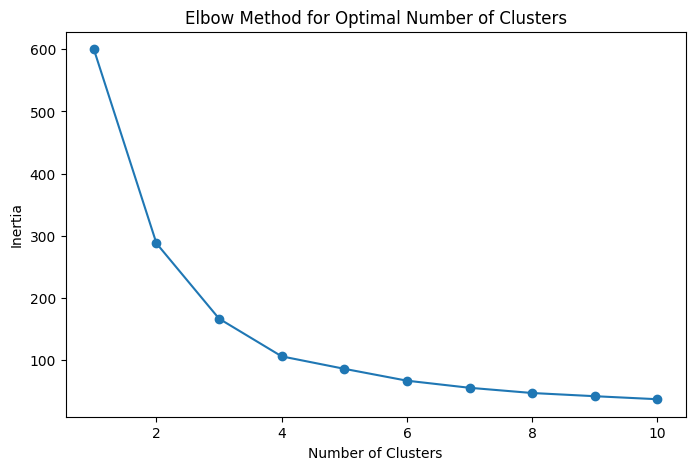

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Original Scale):
   minimum_salary  maximum_salary
0       74.688172      111.559140
1      201.406250      280.125000
2      122.890138      171.748176
Job Listings with Cluster Labels:
                                          job_title  \
0                                   VP, Engineering   
1                             Junior AI/ML Engineer   
2                              Junior Data Engineer   
3                 [ No C2C ] ML Engineer - w/PYTHON   
4  Associate Software Engineer - Fresh Grad Program   

                      company_name         location  minimum_salary  \
0                             Calm           Remote           325.0   
1               Smith & Associates      Houston, TX            42.0   
2                             Bose   Framingham, MA            88.0   
3  Production Modeling Corporation         Troy, MI           150.0   
4                           Lenovo  Morrisville, NC            43.0   

   maximum_salary  cluster  
0        

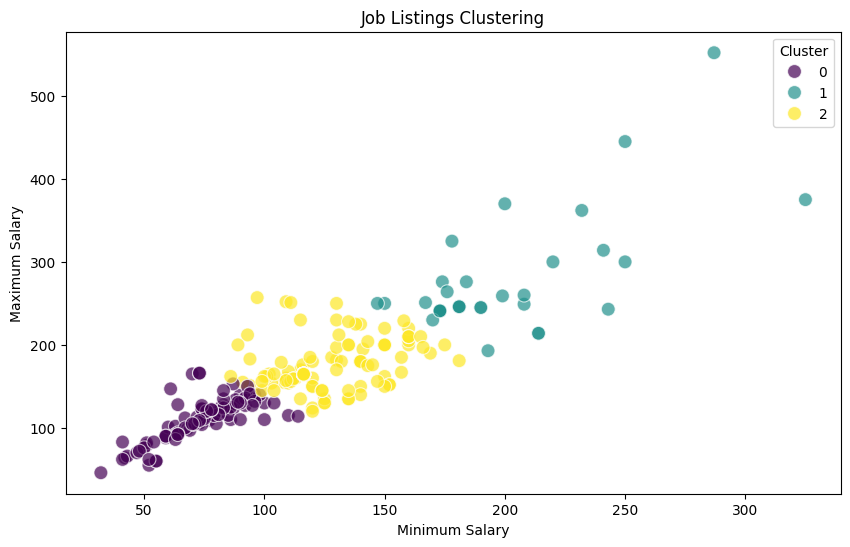

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ml_job_listings is already loaded and preprocessed

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ml_job_listings[['minimum_salary', 'maximum_salary']])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., 3 from the elbow graph)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)
ml_job_listings['cluster'] = kmeans.labels_

# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):")
print(pd.DataFrame(cluster_centers, columns=['minimum_salary', 'maximum_salary']))

# Display job listings with cluster labels
print("Job Listings with Cluster Labels:")
print(ml_job_listings[['job_title', 'company_name', 'location', 'minimum_salary', 'maximum_salary', 'cluster']].head())

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ml_job_listings, x='minimum_salary', y='maximum_salary', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Job Listings Clustering')
plt.xlabel('Minimum Salary')
plt.ylabel('Maximum Salary')
plt.legend(title='Cluster')
plt.show()
